In [76]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# load data into a Pandas DataFrame
# df = pd.read_csv('simplified_data.csv') 
df = pd.read_csv('augmented_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()
print(df.shape)

(1353, 24)


In [100]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   estado_vital                 1353 non-null   int64  
 1   edad                         1353 non-null   int64  
 2   sexo                         1353 non-null   int64  
 3   peso                         1353 non-null   int64  
 4   hipertension_arterial        1353 non-null   int64  
 5   diabetes_mellitus            1353 non-null   int64  
 6   tabaquismo                   1353 non-null   int64  
 7   frecuencia_cardiaca          1353 non-null   int64  
 8   presion_arterial_sistolica   1353 non-null   int64  
 9   presion_arterial_diastolica  1353 non-null   int64  
 10  hb                           1353 non-null   int64  
 11  creatinina                   1353 non-null   float64
 12  ckmb                         1353 non-null   float64
 13  fibrilacion_auricu

,estado_vital,edad,sexo,peso,hipertension_arterial,diabetes_mellitus,tabaquismo,frecuencia_cardiaca,presion_arterial_sistolica,presion_arterial_diastolica,...,insuficiencia_renal_cronica,ieca,furosemida,otros_diureticos,clopidogrel,trigliceridos,glicemia,colesterol,escala_grace,dialisis
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,...,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.101996,66.220990,0.678492,73.026608,0.849224,0.294900,0.478197,84.853659,125.937177,74.700665,...,0.032520,0.872136,0.182557,0.515152,0.961567,1.330968,7.530451,4.781153,109.902439,0.005913
std,0.302754,12.655743,0.467228,11.982885,0.357963,0.456167,0.499709,14.946676,22.987900,14.060935,...,0.177443,0.334062,0.386446,0.499955,0.192311,0.684655,3.480904,1.076720,26.959688,0.076695
min,0.000000,13.000000,0.000000,40.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000,0.500000,34.000000,0.000000
25%,0.000000,57.000000,0.000000,65.000000,1.000000,0.000000,0.000000,78.000000,120.000000,70.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.900000,5.400000,4.100000,89.000000,0.000000
50%,0.000000,67.000000,1.000000,72.000000,1.000000,0.000000,0.000000,86.000000,130.000000,70.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.200000,6.400000,4.900000,110.000000,0.000000
75%,0.000000,75.000000,1.000000,80.000000,1.000000,1.000000,1.000000,88.000000,130.000000,80.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.500000,8.300000,5.400000,128.000000,0.000000
max,1.000000,98.000000,1.000000,150.000000,1.000000,1.000000,1.000000,180.000000,240.000000,130.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,43.000000,10.000000,190.000000,1.000000


From an initial statistical overview of the dataset, we infer that some data features are binary or ordinal, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for systolic and diastolic blood pressure, are unrealistic. This suggests the presence of outliers in the data.

0    1215
1     138
Name: estado_vital, dtype: int64


Text(0, 0.5, 'Number of Observations')

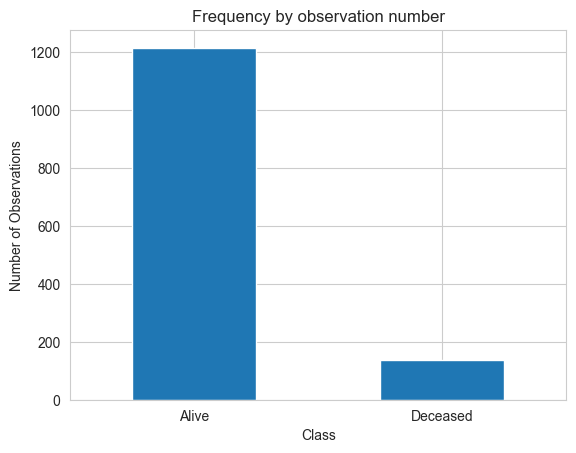

In [101]:
# check distribution of target variable
print(df.estado_vital.value_counts())

count_classes = pd.value_counts(df['estado_vital'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Alive', 'Deceased'])
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

1215 out of 1353 cases in this dataset are labelled alive, and 138 cases are labelled dead. This suggests that the dataset is not balanced. We will need to take this into account when we split the dataset into training and test sets.

<Axes: >

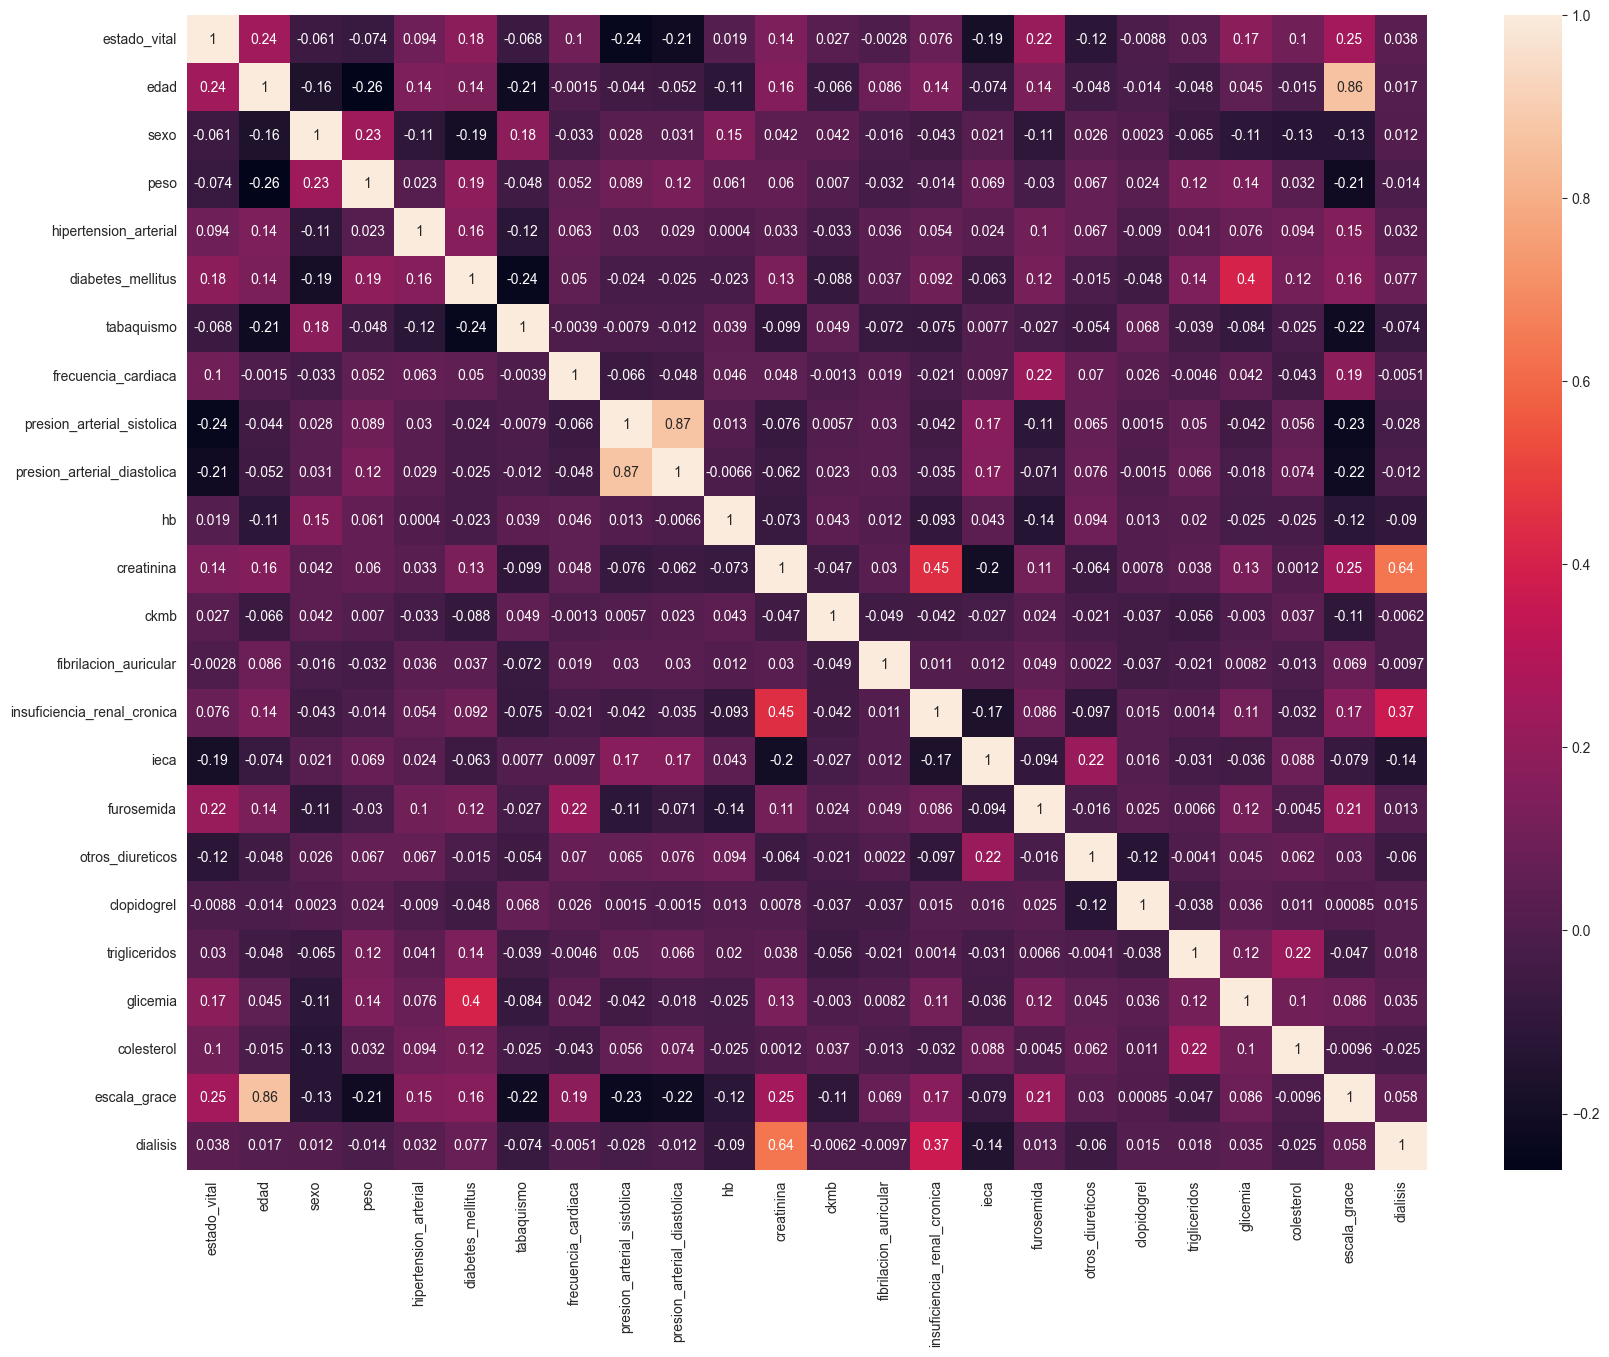

In [102]:
# check correlations
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

A heatmap shows correlations between variables in the dataset. From the above heatmap, we see that no features directly correlate with the label (estado_vital) and that generally, there do not exist significant correlations between other variables. However, correlations exist between few variables:
- Creatinina and insufuciencia_renal_crónica are correlated with a score of 0.45.
- Edad with escala_grace with a score of 0.43.
- Diabetes_mellitus with glicemia with a score of 0.4.
- Creatinina with dialisis with a score of 0.64

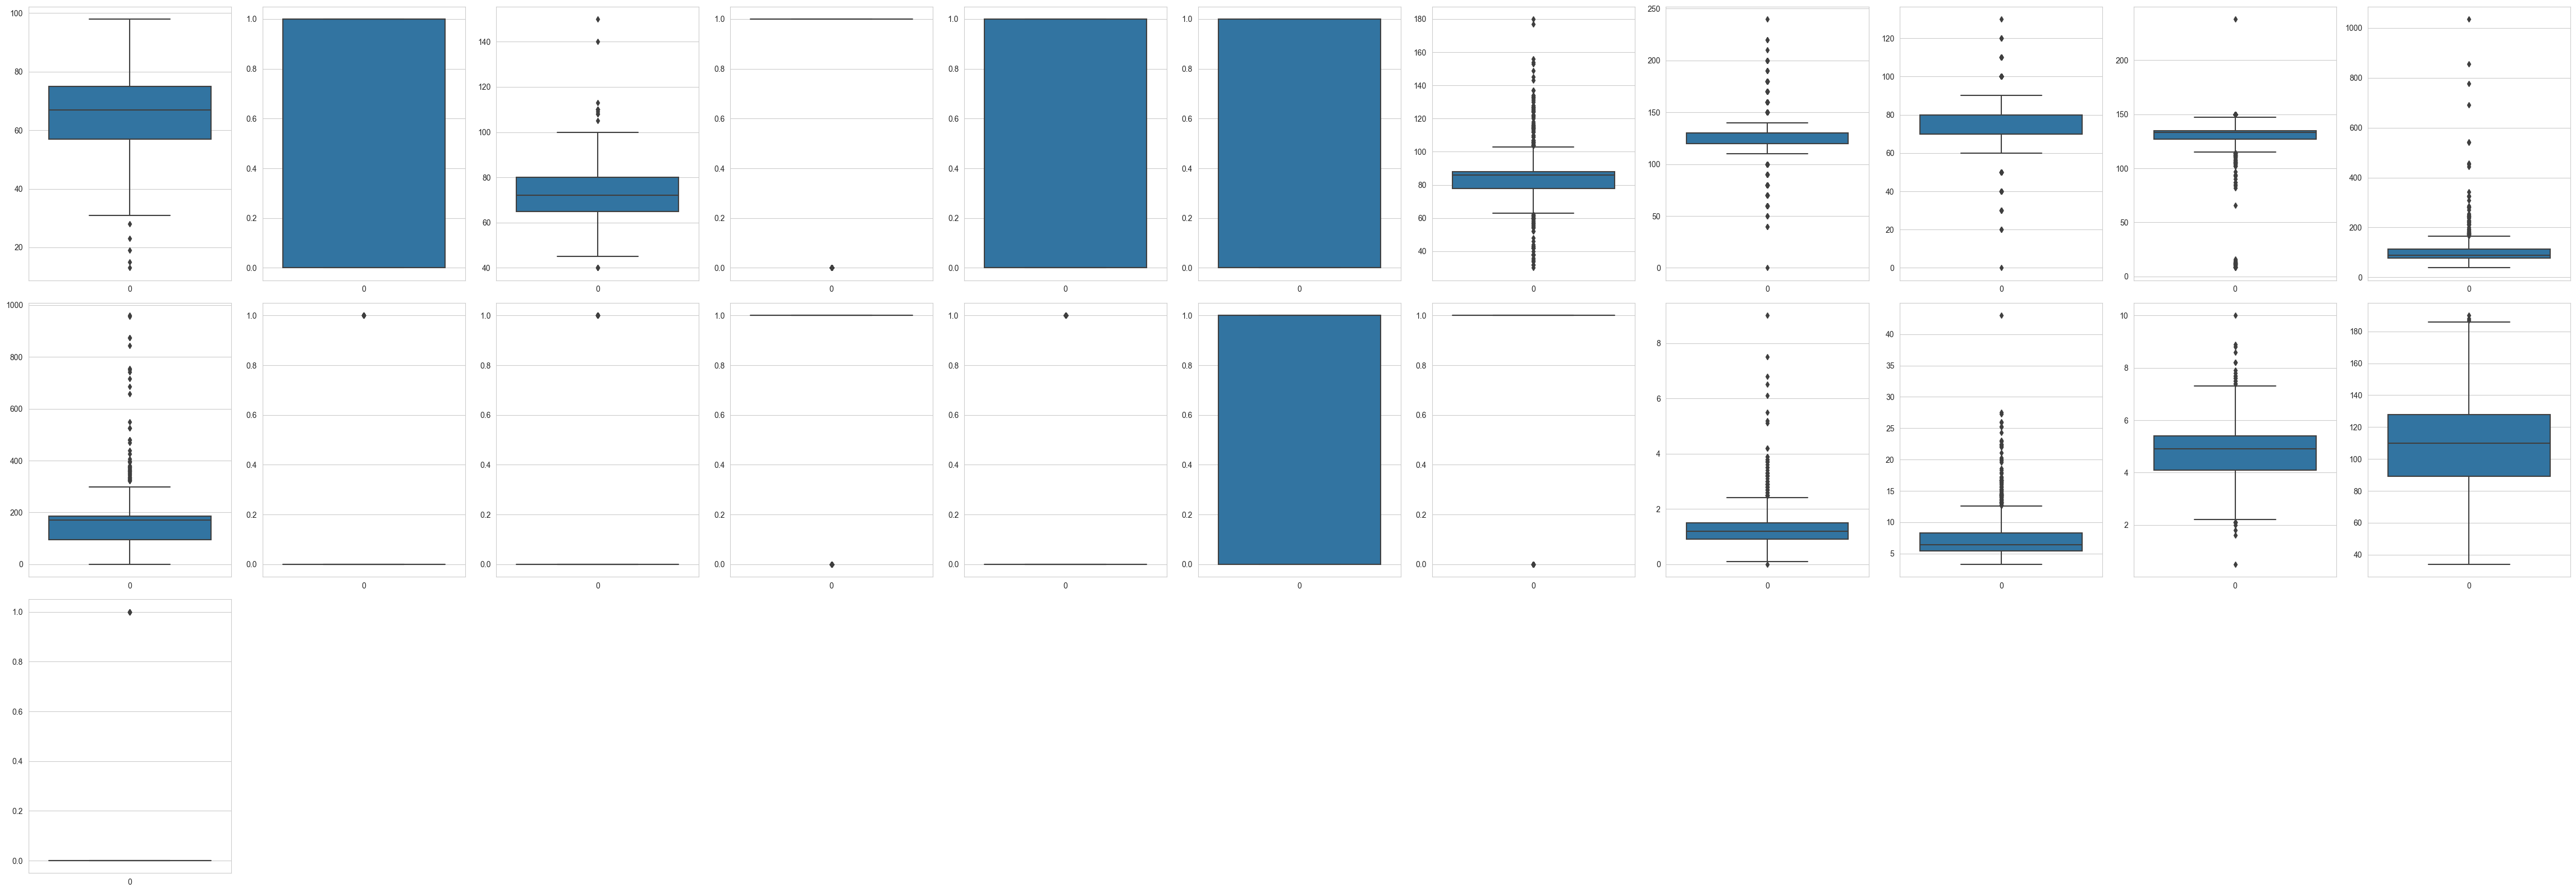

In [103]:
# check outliers

def check_outliers(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows + 1,int(number_of_columns),i)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],orient='v')
        plt.tight_layout()
        
check_outliers(df)

The above boxplots confirm our suspicion that there are outliers in the dataset. There appear to be several outliers in the systolic and diastolic variables. These outliers might be explained by human error when entering data into the .csv format. Our prediction model might benefit if these outliers were removed from the data.

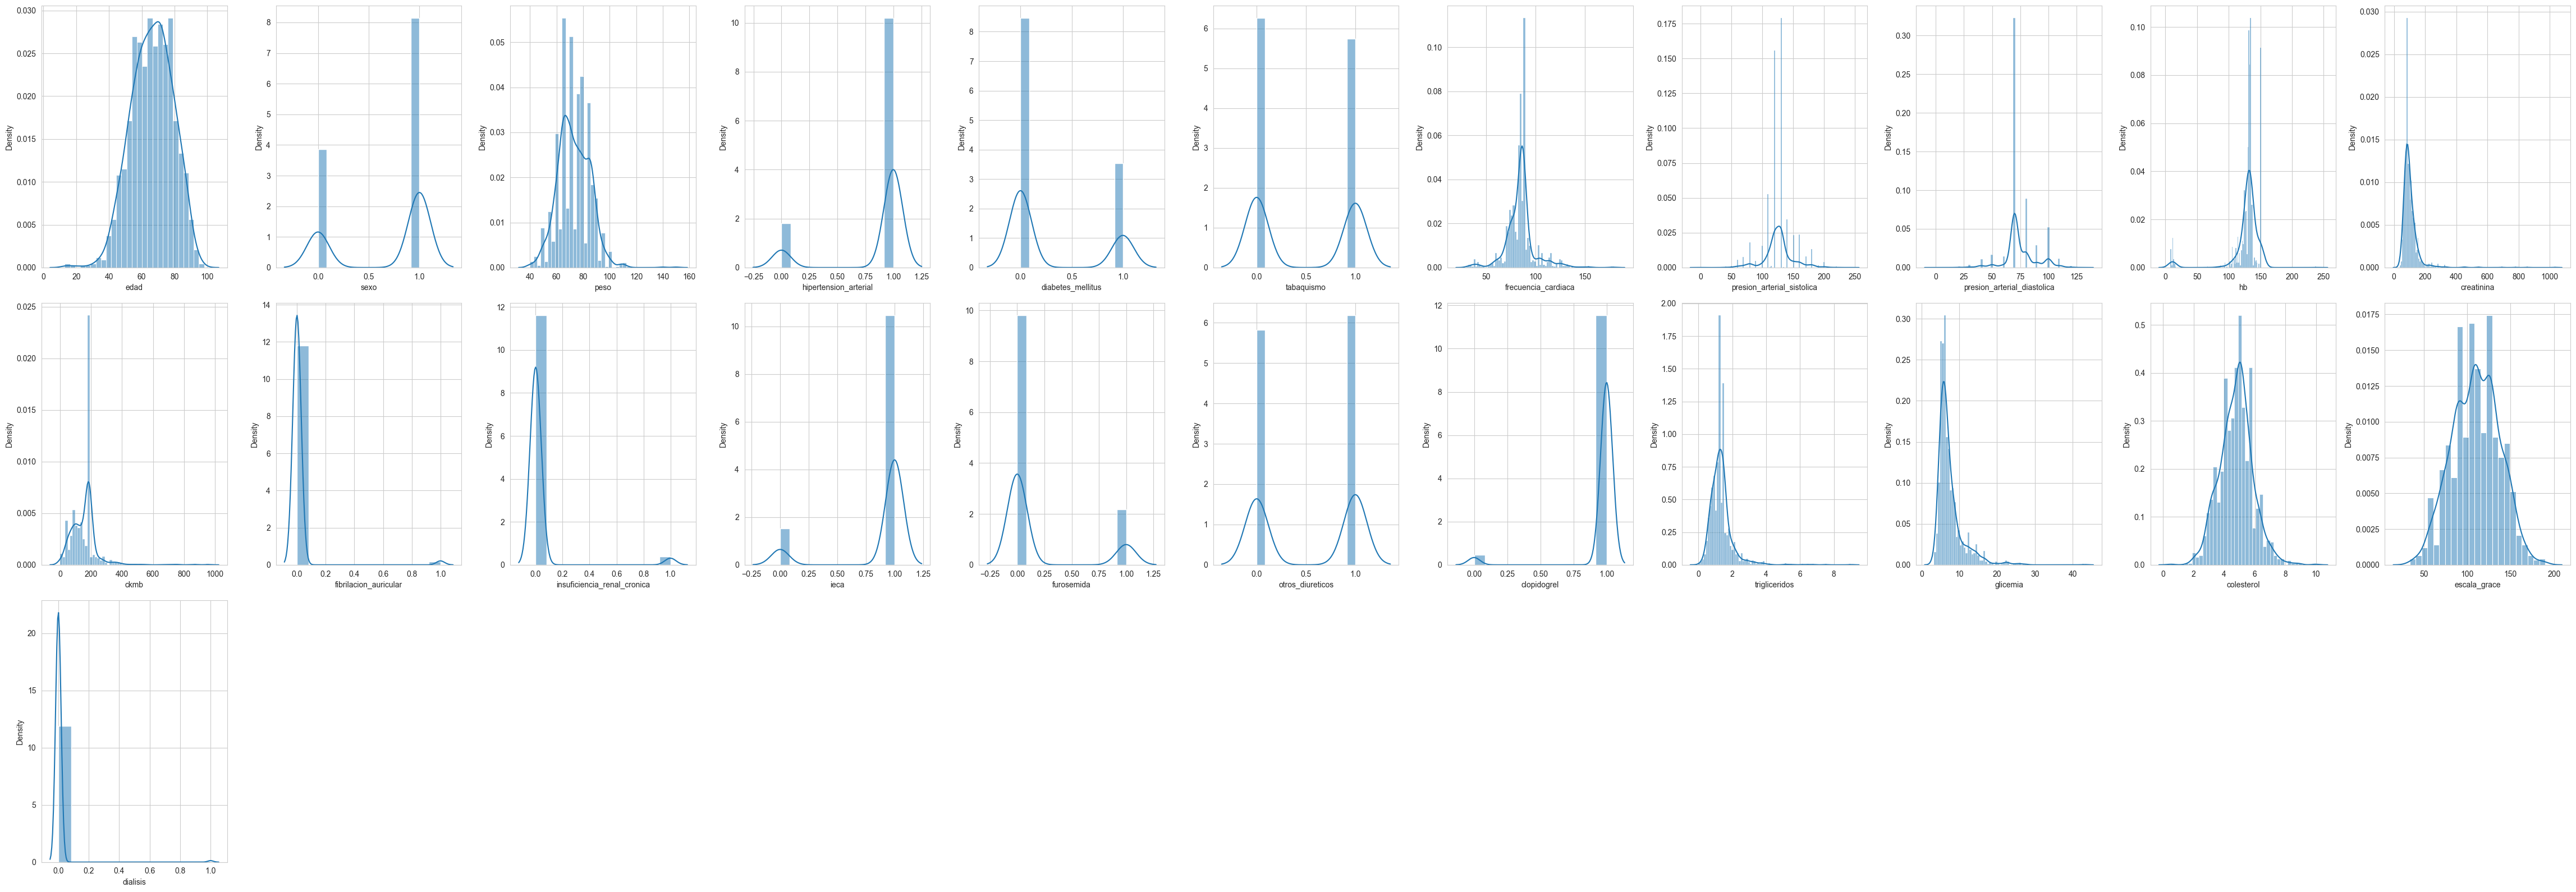

In [104]:
# check distribution and skew
def check_dist(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows+1,int(number_of_columns),i)
        sns.histplot(df[l[i]],kde=True,stat='density', kde_kws=dict(cut=3)) 
        plt.tight_layout()
        
check_dist(df)

Histograms show the distribution of each feature in the dataset. There appears to be some variation in weight, but edad, frecuencia cardiaca and creatinina are roughly normally distributed. However, the histograms further suggest the presence of outliers in the blood pressure features. Moreover, there exist categorical features in the dataset, such as sexo, hipertension_arterial, diabetes_mellitus, tabaquismo, fibricación auricular, insuficiencia renal cronica, ieca, furosemida, otros diureticos y clopidogrel.

Note that we are dealing with a mix of continuous, ordinal, and binary data, as confirmed from the above data analysis. We can combine all of these data types in one model. Here are a few typical steps we took to preprocess this data before modeling.

- Standardize all continuous features: All continuous input should be standardized. For every continuous feature, compute its mean (𝜇) and standard deviation (𝜎) and calculate 𝑥 = (𝑥−𝜇) / 𝜎.
- Binarize categorical/discrete features (create dummy variables): For all categorical features, represent them as multiple boolean features. For example, instead of having one feature called cholesterol, have 3 boolean features - chol_normal, chol_above_normal, chol_well_above_normal and appropriately set these features to 0 or 1. As can be seen, for every categorical feature, k binary features are added, where k is the number of values that the categorical feature takes.

In [105]:
cont_cols = ['edad','peso','presion_arterial_sistolica','presion_arterial_diastolica','frecuencia_cardiaca','hb','creatinina','ckmb','trigliceridos','glicemia','colesterol','escala_grace']
bin_cols = ['estado_vital','sexo','hipertension_arterial','diabetes_mellitus','tabaquismo','fibrilacion_auricular','insuficiencia_renal_cronica','ieca','furosemida','otros_diureticos','clopidogrel','dialisis']

# create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# create an object to transform the data to fit minmax processor
df_scaled = min_max_scaler.fit_transform(df[cont_cols])

# run the normalizer on the dataframe
df_normalized = pd.DataFrame(df_scaled)
df_normalized.columns = cont_cols
df_normalized.head()

,edad,peso,presion_arterial_sistolica,presion_arterial_diastolica,frecuencia_cardiaca,hb,creatinina,ckmb,trigliceridos,glicemia,colesterol,escala_grace
0,0.000000,0.409091,0.500000,0.538462,0.200000,0.556522,0.032064,0.384375,0.266667,0.098237,0.536842,0.076923
1,0.023529,0.154545,0.500000,0.538462,0.433333,0.526087,0.067134,0.151042,0.200000,0.188917,0.452632,0.153846
2,0.070588,0.227273,0.500000,0.615385,0.246667,0.434783,0.023046,0.192396,0.066667,0.173804,0.347368,0.000000
3,0.117647,0.272727,0.500000,0.538462,0.386667,0.543478,0.043086,0.194792,0.066667,0.035264,0.515789,0.121795
4,0.176471,0.318182,0.666667,0.769231,0.313333,0.552174,0.036072,0.192396,0.100000,0.073048,0.252632,0.057692


In [106]:
df_normalized = pd.concat([df_normalized, df[bin_cols]], axis=1)

df_normalized.head()

,edad,peso,presion_arterial_sistolica,presion_arterial_diastolica,frecuencia_cardiaca,hb,creatinina,ckmb,trigliceridos,glicemia,...,hipertension_arterial,diabetes_mellitus,tabaquismo,fibrilacion_auricular,insuficiencia_renal_cronica,ieca,furosemida,otros_diureticos,clopidogrel,dialisis
0,0.000000,0.409091,0.500000,0.538462,0.200000,0.556522,0.032064,0.384375,0.266667,0.098237,...,1,0,0,0,0,1,0,1,1,0
1,0.023529,0.154545,0.500000,0.538462,0.433333,0.526087,0.067134,0.151042,0.200000,0.188917,...,1,1,1,0,0,1,0,0,1,0
2,0.070588,0.227273,0.500000,0.615385,0.246667,0.434783,0.023046,0.192396,0.066667,0.173804,...,1,0,0,0,0,0,1,0,1,0
3,0.117647,0.272727,0.500000,0.538462,0.386667,0.543478,0.043086,0.194792,0.066667,0.035264,...,1,0,0,0,0,1,0,1,1,0
4,0.176471,0.318182,0.666667,0.769231,0.313333,0.552174,0.036072,0.192396,0.100000,0.073048,...,1,0,1,0,0,1,0,0,1,0


In [114]:
# save this cleaned data
df_normalized.to_csv('data_cleaned.csv', index=False)

# Support Vector Machine (SVM) classifier

In [115]:
# try an SVM Classifier
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

df_normalized= df_normalized.dropna()
print(df_normalized.shape)
X = df_normalized.drop('estado_vital', axis=1)
y = df_normalized['estado_vital']
# class wights
class_weight = {0: 1, 1: len(y) / sum(y)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5) # 80% training and 20% test

(1353, 24)


In [116]:
# create a svm classifier
clf = svm.SVC(kernel='rbf',class_weight=class_weight) # rbf kernel
# train the model using the training sets
clf.fit(X_train, y_train)

SVC(class_weight={0: 1, 1: 9.804347826086957})

In [117]:
# evaluate the model
def evaluate_model(clf, X_test, y_test):

    # predict the response for test dataset
    y_pred = clf.predict(X_test)
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels='Alive' , yticklabels='Deceased', annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))
    # calc auc
#     probas = clf.predict_proba(X_test)
#     auc = roc_auc_score(testy, probs)
#     print('AUC: %.3f' % auc)

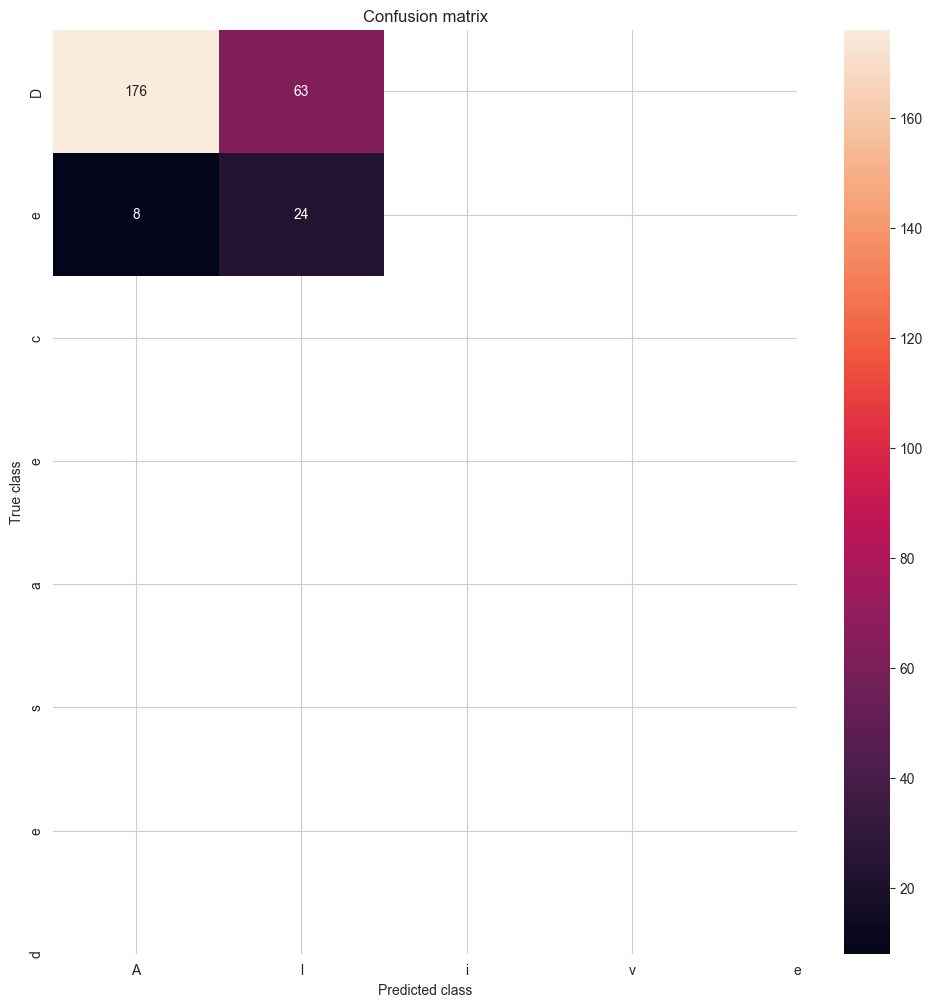

              precision    recall  f1-score   support

           0       0.96      0.74      0.83       239
           1       0.28      0.75      0.40        32

    accuracy                           0.74       271
   macro avg       0.62      0.74      0.62       271
weighted avg       0.88      0.74      0.78       271



In [118]:
evaluate_model(clf, X_test, y_test)


# Random Forest classifier

In [119]:
# try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# create a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators=100)

# train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

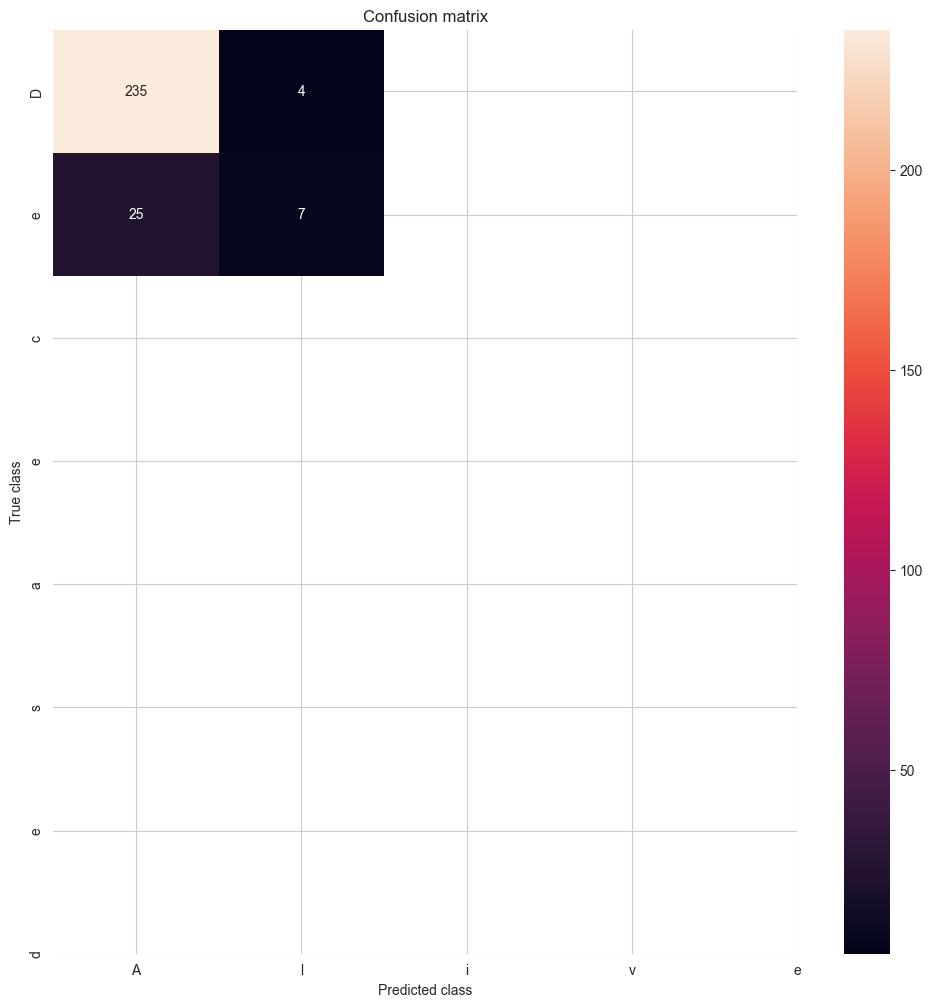

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       239
           1       0.64      0.22      0.33        32

    accuracy                           0.89       271
   macro avg       0.77      0.60      0.63       271
weighted avg       0.87      0.89      0.87       271



frecuencia_cardiaca            0.111183
escala_grace                   0.100615
glicemia                       0.088005
creatinina                     0.084088
edad                           0.083531
presion_arterial_sistolica     0.081752
colesterol                     0.075311
hb                             0.056576
peso                           0.055383
presion_arterial_diastolica    0.051827
ckmb                           0.051773
trigliceridos                  0.045192
furosemida                     0.023734
diabetes_mellitus              0.021010
otros_diureticos               0.017636
ieca                           0.015757
sexo                           0.011688
tabaquismo                     0.010119
hipertension_arterial          0.004726
insuficiencia_renal_cronica    0.004654
fibrilacion_auricular          0.002699
dialisis                       0.001420
clopidogrel                    0.001323
dtype: float64

In [120]:
evaluate_model(rf_clf, X_test, y_test)

# get feature importances
feature_imp = pd.Series(rf_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp

# Logistic Regression classifier

In [121]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [122]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
def lrcv(key, target_vars, df, resample=True):
    X = df.drop(target_vars[key], axis=1)
    y = df[key]
    print('\n{0}\n'.format(key))

    cols = X.columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10) # 80% training and 20% test

    if resample:
        smote = SMOTE()
        print("Before oversampling, counts of label '1': {}".format(sum(y_train==1)))
        print("Before oversampling, counts of label '0': {} \n".format(sum(y_train==0)))
        X_train, y_train = smote.fit_sample(X_train, y_train.ravel())
        print("After oversampling, counts of label '1': {}".format(sum(y_train==1)))
        print("After oversampling, counts of label '0': {} \n".format(sum(y_train==0)))
#         plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')
        
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
#     predicted = cross_val_predict(LogisticRegression(), X, y, cv=cv)
    print('accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print(metrics.classification_report(y_test, y_pred))
    
    feature_coefs = pd.Series(clf.coef_.reshape(-1),index=cols).sort_values(ascending=False)
    print(feature_coefs)
    
    print('Confusion matrix:\n')
    cm = metrics.confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in [0,1]])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt="d")

    return clf


estado_vital

accuracy: 0.8856088560885609
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       236
           1       0.62      0.29      0.39        35

    accuracy                           0.89       271
   macro avg       0.76      0.63      0.66       271
weighted avg       0.87      0.89      0.87       271

diabetes_mellitus              0.197729
colesterol                     0.172895
furosemida                     0.144782
glicemia                       0.127521
hipertension_arterial          0.071505
trigliceridos                  0.047512
edad                           0.040987
frecuencia_cardiaca            0.008101
creatinina                     0.002034
hb                             0.000235
ckmb                          -0.000020
fibrilacion_auricular         -0.001331
sexo                          -0.001599
insuficiencia_renal_cronica   -0.001868
escala_grace                  -0.004036
dialisis                     

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


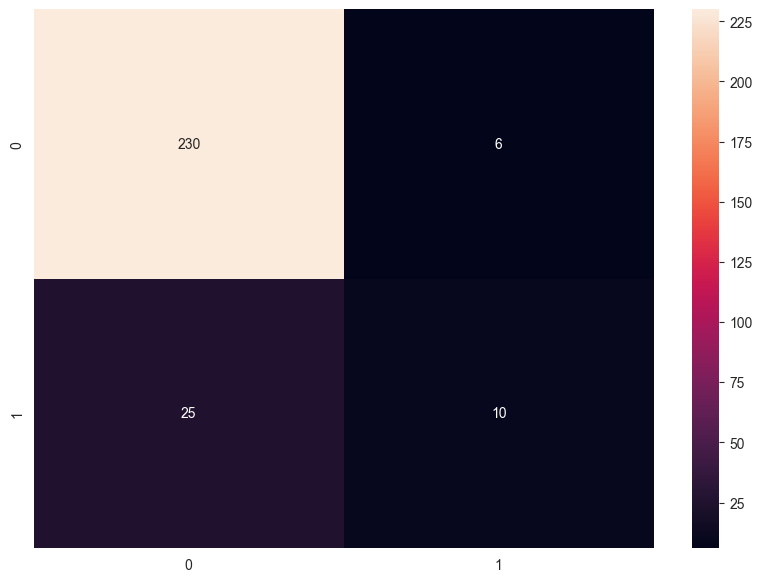

In [123]:
target_vars = {'estado_vital': ['estado_vital']}

clf = lrcv('estado_vital', target_vars, df, resample=False)

# K-Fold Cross Validation

In [124]:
from sklearn import svm
from sklearn.model_selection import *
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def evaluate(C, X_test, y_test):
    y_pred = C.predict(X_test)
    
    k_fold = KFold(10, shuffle = False, random_state=None) #10-fold cross-validation
    cv_scores = cross_val_score(C, X_test, y_test.values.ravel(), cv = k_fold)

    print("Cross-validation score means: ", cv_scores.mean())
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels='Alive' , yticklabels='Deceased', annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

Cross-validation score means:  0.8820105820105819
Accuracy:  0.8819188191881919
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       239
           1       0.00      0.00      0.00        32

    accuracy                           0.88       271
   macro avg       0.44      0.50      0.47       271
weighted avg       0.78      0.88      0.83       271



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


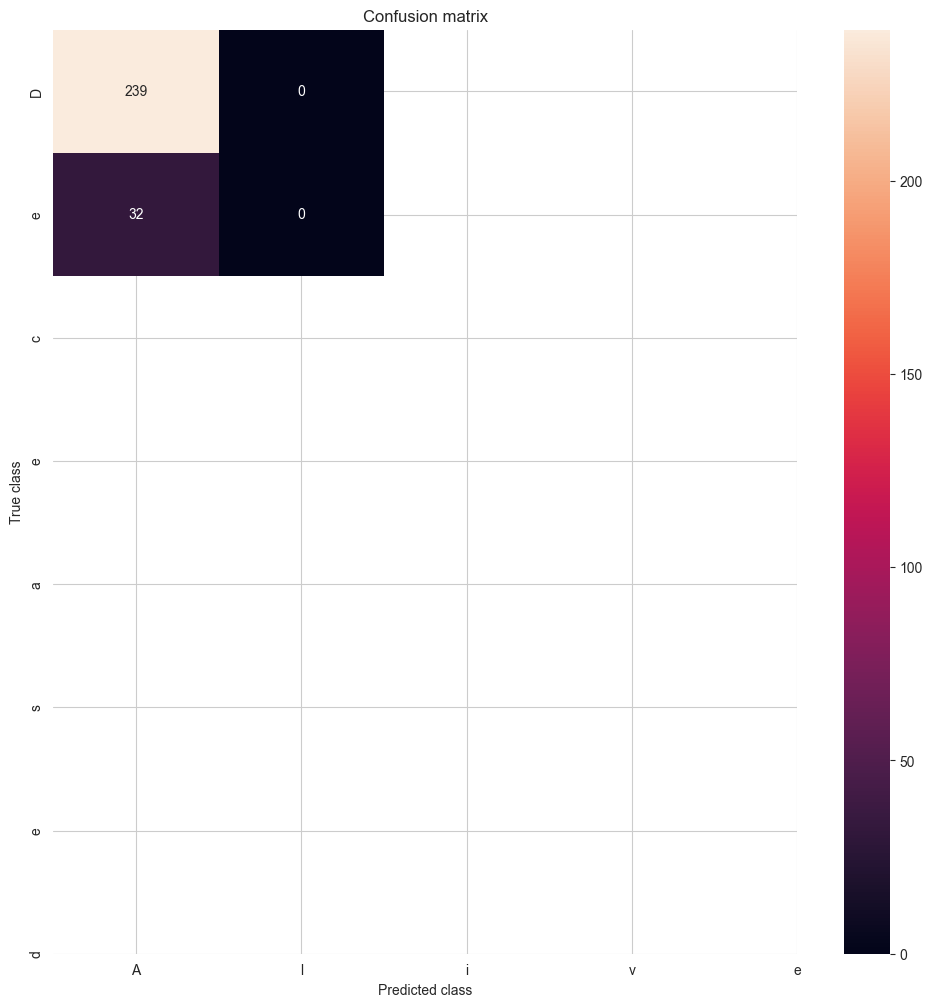

In [125]:
#training SVM SVC w/rbf kernel
C = svm.SVC(gamma = 'scale') #create classifier
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.22883597883597878
Accuracy:  0.8154981549815498
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       239
           1       0.33      0.53      0.40        32

    accuracy                           0.82       271
   macro avg       0.63      0.69      0.65       271
weighted avg       0.86      0.82      0.83       271



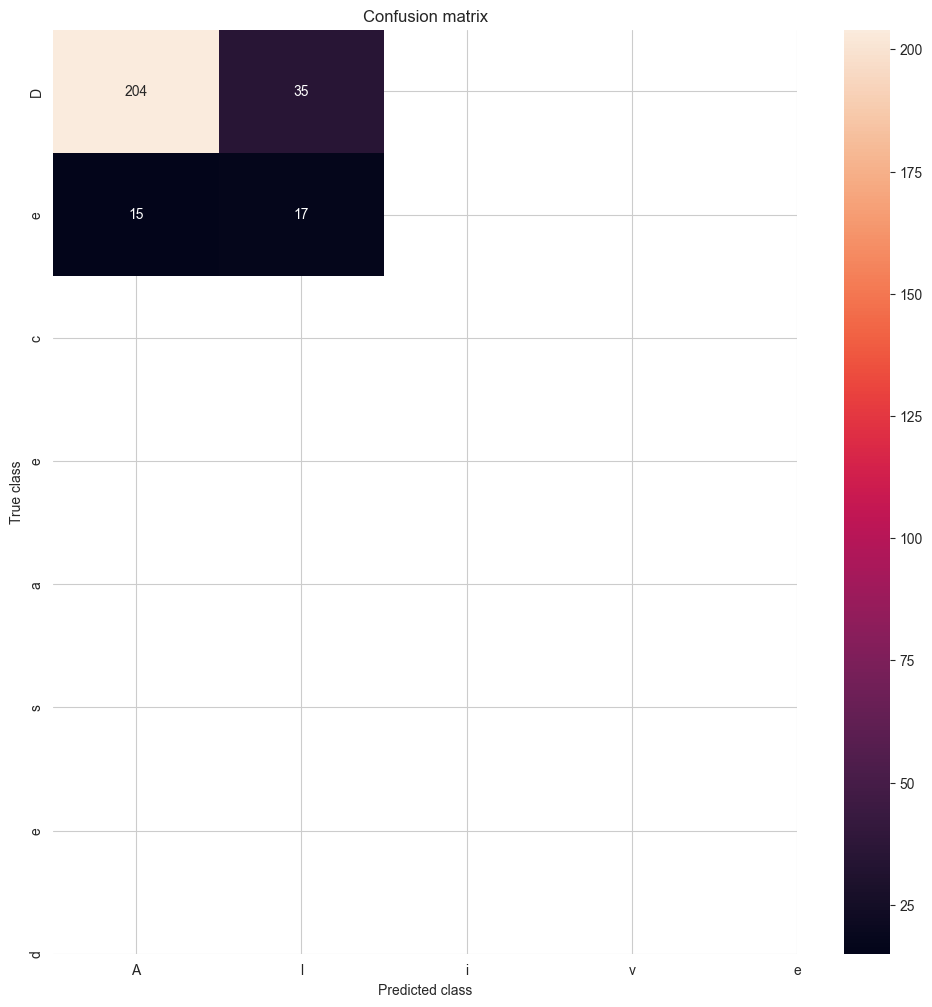

In [126]:
#training Gaussian Naive Bayes classifier
C = GaussianNB()
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Cross-validation score means:  0.8714285714285713
Accuracy:  0.8413284132841329
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       239
           1       0.35      0.41      0.38        32

    accuracy                           0.84       271
   macro avg       0.64      0.65      0.64       271
weighted avg       0.85      0.84      0.85       271



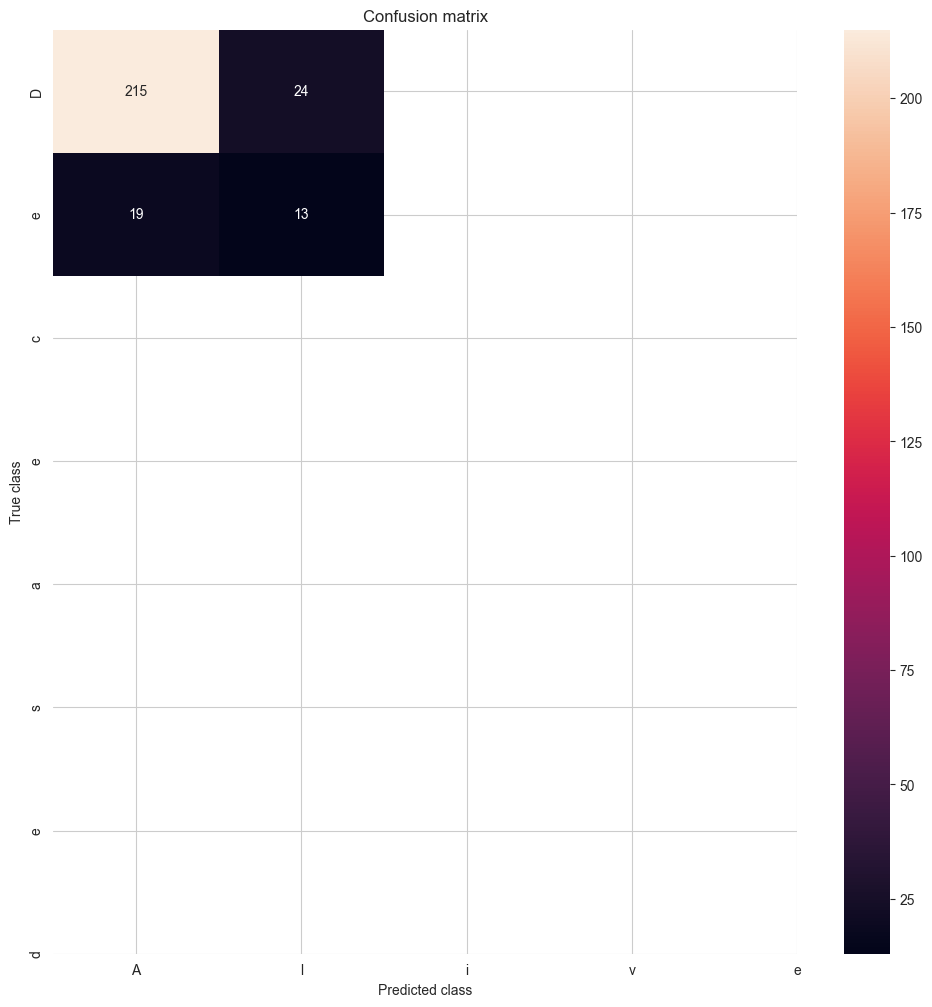

In [127]:
#training supervised MLP
C = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (100,))
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.8636243386243386
Accuracy:  0.8523985239852399
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       239
           1       0.30      0.19      0.23        32

    accuracy                           0.85       271
   macro avg       0.60      0.56      0.57       271
weighted avg       0.83      0.85      0.84       271



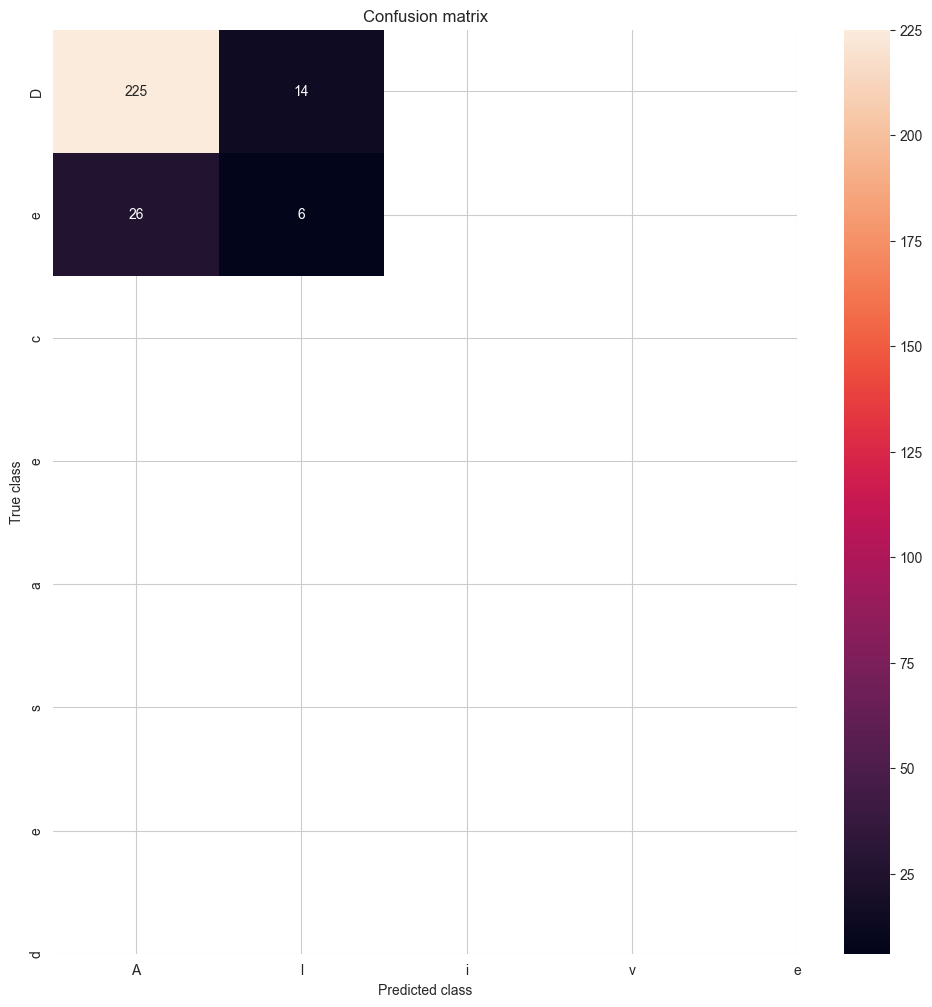

In [128]:
#training KNN
C = KNeighborsClassifier(n_neighbors = 3)
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.9150793650793652
Accuracy:  0.8929889298892989
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       239
           1       0.62      0.25      0.36        32

    accuracy                           0.89       271
   macro avg       0.76      0.61      0.65       271
weighted avg       0.87      0.89      0.87       271



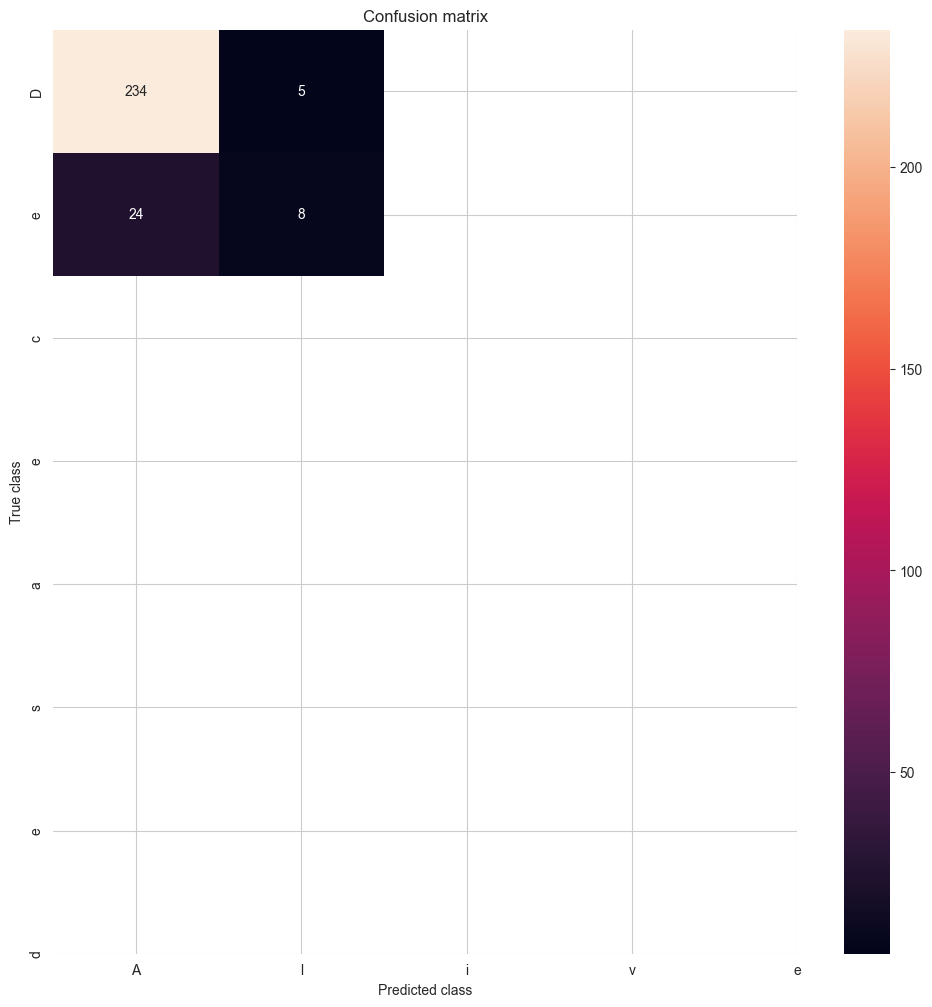

In [129]:
#training random forest classifier
C = RandomForestClassifier(n_estimators = 100)
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.8784391534391535
Accuracy:  0.8892988929889298
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       239
           1       0.60      0.19      0.29        32

    accuracy                           0.89       271
   macro avg       0.75      0.59      0.61       271
weighted avg       0.86      0.89      0.86       271



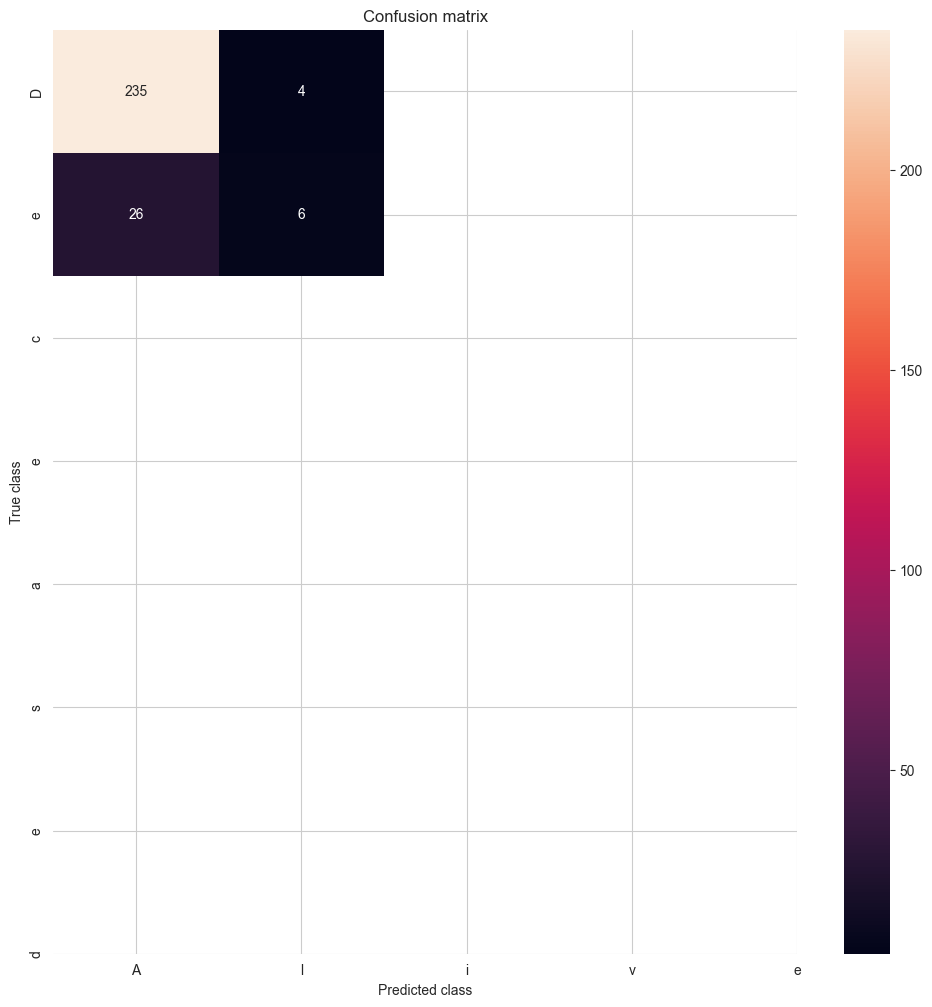

In [130]:
#Training logistic regression model
C = LogisticRegression(solver = 'lbfgs')
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)